In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def plot_evolution(best_fit, title):
    plt.plot(best_fit) 
    plt.title(title)
    plt.ylabel('Fitness')
    plt.xlabel('Generation')    
    plt.show()

# Rastrigin function
(https://en.wikipedia.org/wiki/Rastrigin_function)

In mathematical optimization, the Rastrigin function is a non-convex function used as a performance test problem for optimization algorithms due to a large amount of local minima.

f(x) = A * d + sum(x_i^2 - A * cos(2 * pi * x_i))


PSO based of https://induraj2020.medium.com/implementing-particle-swarm-optimization-in-python-c59278bc5846
GA based of ChatGPT

# GA

In [29]:
"""
Class for genetic algorithm
Args:
    pop_size: number of individuals in population
    dimensions: number of dimensions for Rastringin problem
    generations: number of max generations to run
    mutation_rate: probability of mutation to occour
""" 
class GA:    
    def __init__(self, pop_size, dimensions, generations,mutation_rate = 0.1):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = self.initialize_population()
    
    # Definition of Rastringin Function
    def rastrigin_function(self, x):
        A = 10
        return A * len(x) + sum([(np.power(xi, 2) - A * np.cos(2 * np.pi * xi)) for xi in x])
    
    # Initialize first population at random 
    def initialize_population(self, x_min=-5.12, x_max=5.12):
        return [np.random.uniform(x_min, x_max, self.dimensions) for _ in range(self.pop_size)]
    
    # Tournament selection of parents
    def tournament_selection(self, fitness_values, tournament_size=3):
        selected = []
        for _ in range(2):  # Select 2 parents
            tournament_indices = np.random.choice(len(self.population), tournament_size, replace=False)
            tournament_fitness = [fitness_values[i] for i in tournament_indices]
            selected.append(self.population[tournament_indices[np.argmin(tournament_fitness)]])
        return selected
    
    # Perform crossover between two individuals
    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, len(parent1))
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]), axis=None)
        return child
    
    # Mutate child based on mutation rate
    def mutation(self, child):
        for i in range(len(child)):
            if np.random.rand() < self.mutation_rate:
                child[i] += np.random.uniform(-0.5, 0.5)  # Small random change
        return child
    
    # Run the algorithm
    def run_genetic_algorithm(self):
        best_solution = None
        best_fitness = float('inf')
        top_fitness = []
        
        for _ in range(self.generations):
            fitness_values = [self.rastrigin_function(ind) for ind in self.population]
            top_fitness.append(best_fitness)
            
            for i in range(self.pop_size // 2):
                parent1, parent2 = self.tournament_selection(fitness_values)
                child = self.crossover(parent1, parent2)
                child = self.mutation(child)
                self.population[i] = child

            best_idx = np.argmin(fitness_values)
            if fitness_values[best_idx] < best_fitness:
                best_solution = self.population[best_idx]
                best_fitness = fitness_values[best_idx]

        return top_fitness, best_solution, best_fitness


In [43]:
# GA results
ga = GA(pop_size=100, dimensions=5, generations=1000)
ga_top_fitness, ga_best_solution, ga_best_fitness = ga.run_genetic_algorithm()
print("Best solution:", ga_best_solution)
print("Best fitness:", ga_best_fitness)

Best solution: [-3.92831436  2.19940556 -1.84856348  0.36465636 -0.06199456]
Best fitness: 5.789396784460756


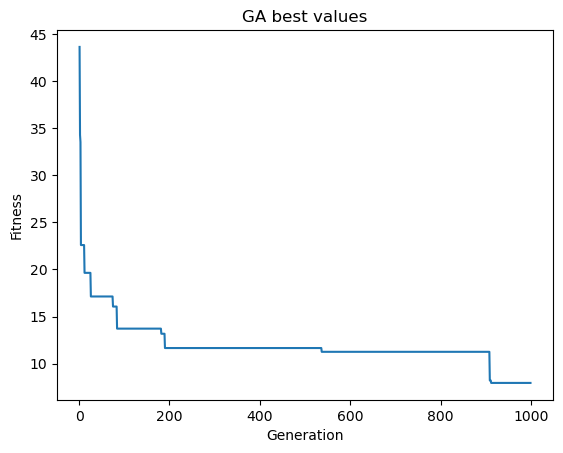

In [40]:
plot_evolution(ga_top_fitness, "GA best values")

# PSO

In [35]:
"""
Class for Particle Swarm Optimization
Args:
    pop_size: number of particles in population
    dimensions: number of dimensions for Rastringin problem
    generations: number of max generations to run
    w:
    c1:
    c2:
""" 
class PSO:
    def __init__(self, pop_size=30, dimensions=2, generations=100, w=0.5, c1=1, c2=2):
        self.dim = dimensions
        self.num_particles = pop_size
        self.max_iter = generations
        self.w = w
        self.c1 = c1
        self.c2 = c2
        
    # Definition of Rastringin Function
    def rastrigin_function(self, x):
        A = 10
        return A * len(x) + sum([(np.power(xi, 2) - A * np.cos(2 * np.pi * xi)) for xi in x])
    
    # Execution of algorithm
    def pso_algorithm(self):
        particles = np.random.uniform(-5.12, 5.12, (self.num_particles, self.dim))
        velocities = np.zeros((self.num_particles, self.dim))
        top_fitness = []
        
        best_positions = np.copy(particles)
        best_fitness = np.array([self.rastrigin_function(p) for p in particles])
        swarm_best_position = best_positions[np.argmin(best_fitness)]
        swarm_best_fitness = np.min(best_fitness)

        for i in range(self.max_iter):
            top_fitness.append(swarm_best_fitness)
            r1 = np.random.uniform(0, 1, (self.num_particles, self.dim))
            r2 = np.random.uniform(0, 1, (self.num_particles, self.dim))
            velocities = self.w * velocities + self.c1 * r1 * (best_positions - particles) + self.c2 * r2 * (
                        swarm_best_position - particles)
            particles += velocities

            fitness_values = np.array([self.rastrigin_function(p) for p in particles])

            improved_indices = np.where(fitness_values < best_fitness)
            best_positions[improved_indices] = particles[improved_indices]
            best_fitness[improved_indices] = fitness_values[improved_indices]
            if np.min(fitness_values) < swarm_best_fitness:
                swarm_best_position = particles[np.argmin(fitness_values)]
                swarm_best_fitness = np.min(fitness_values)

        return top_fitness, swarm_best_position, swarm_best_fitness




In [53]:
# PSO results
pso = PSO(dim=5, num_particles=20, max_iter=100)
pso_top_fitness, pso_best_solution, pso_best_fitness = pso.pso_algorithm()
print("Best solution:", pso_best_solution)
print("Best fitness:", pso_best_fitness)

Best solution: [ 0.00020398 -0.01216151 -0.00048606 -0.00912862  0.00043808]
Best fitness: 0.04594947901779989


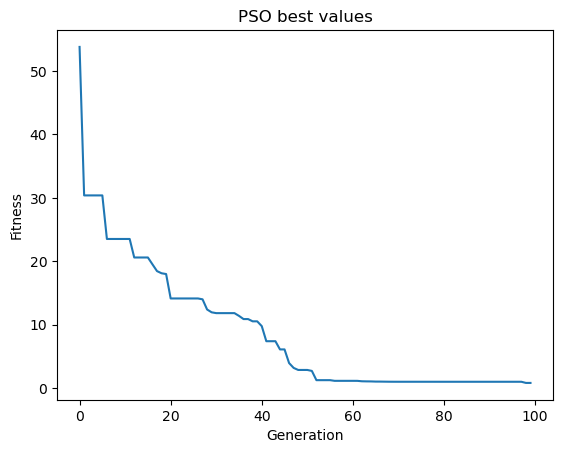

In [54]:
plot_evolution(pso_top_fitness, "PSO best values")

# Hybrid approaches
Ideas:
- Use GA to find best set of paremeters for PSO
